# Intern Name : Himanshu Nirwan
# Task : Iris Flower Classification

## Introduction
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

## Import modules


In [30]:
import sklearn 
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the Dataset

In [31]:
df = sns.load_dataset('iris')

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
#display basic stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
#displaying no. of cells in each class
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Preprocessing dataset

In [36]:
#check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Analysis

In [37]:
import plotly.express as px
fig = px.histogram(df, x='sepal_length')
fig

In [38]:
fig = px.histogram(df, x='sepal_width')
fig

In [39]:
fig = px.histogram(df, x='petal_length')
fig

In [40]:
fig = px.histogram(df, x='petal_width')
fig

In [41]:
fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species")
fig.show()

In [42]:
fig = px.scatter(df, x="petal_length", y="petal_width", color="species")
fig.show()

In [43]:
fig = px.scatter(df, x="sepal_length", y="petal_length", color="species")
fig.show()

In [44]:
fig = px.scatter(df, x="sepal_width", y="petal_width", color="species")
fig.show()

## Correlation Matrix

In [46]:
#display correlation matrix
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

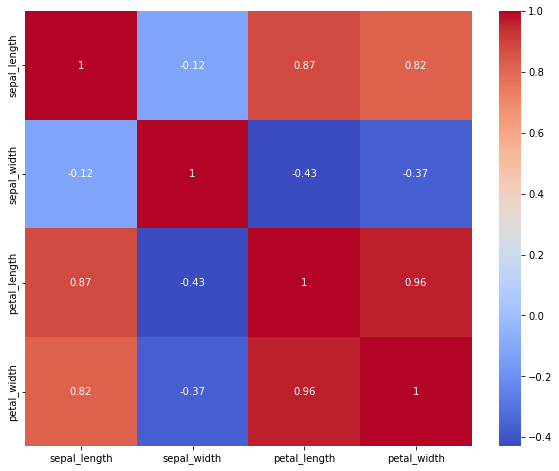

In [62]:
corr = df.corr()

#plotting the heatmap
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr, annot = True, ax= ax, cmap='coolwarm')

## Model Training and Testing

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [72]:
#input data
X = df.drop(columns = ['species'])

#output data
Y = df['species']

#split the data in the training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [81]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)
print('Logistic Regression Accuracy: ', model.score(x_test, y_test)*100)

Logistic Regression Accuracy:  93.33333333333333


In [82]:
# K-nearest neighbours
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print('K-nearest Accuracy: ', model.score(x_test, y_test)*100)

K-nearest Accuracy:  95.55555555555556


In [83]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Decision Tree Accuracy: ', model.score(x_test, y_test)*100)

Decision Tree Accuracy:  95.55555555555556


## Saving the model

In [53]:
filename = 'iris_prediction.sav'
pickle.dump(model, open(filename, 'wb'))

In [54]:
load_model = pickle.load(open(filename,'rb'))

In [55]:
load_model.predict([[6.0,2,4.1,1.5]])

array(['versicolor'], dtype=object)